<a href="https://colab.research.google.com/github/brycecturner/ship_detection_from_space/blob/main/Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import cm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir("/content/drive/MyDrive/ship_detection/MASATI-v2")

In [72]:
def plot_grayscale(img, title, h=8):
    plt.figure(figsize=(h, h))
    _=plt.imshow(img, cmap=plt.get_cmap('gray'))
    _=plt.title(title)

In [4]:
def transform_images(file_location):
  img = skimage.io.imread(f'/content/drive/MyDrive/ship_detection/MASATI-v2/{file_location}')
  bw = skimage.color.rgb2gray(img)
  return bw
  # transform, angles, d = skimage.transform.hough_line(bw)
  # return transform, angles, d

In [5]:
def test_hough_line(file_location):

  image = transform_images(file_location)
  tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
  h, theta, d = skimage.transform.hough_line(image, theta=tested_angles)

  # Generating figure 1
  fig, axes = plt.subplots(1, 3, figsize=(15, 6))
  ax = axes.ravel()

  ax[0].imshow(image, cmap=cm.gray)
  ax[0].set_title('Input image')
  ax[0].set_axis_off()

  angle_step = 0.5 * np.diff(theta).mean()
  d_step = 0.5 * np.diff(d).mean()
  bounds = [np.rad2deg(theta[0] - angle_step),
            np.rad2deg(theta[-1] + angle_step),
            d[-1] + d_step, d[0] - d_step]
  ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
  ax[1].set_title('Hough transform')
  ax[1].set_xlabel('Angles (degrees)')
  ax[1].set_ylabel('Distance (pixels)')
  ax[1].axis('image')

  ax[2].imshow(image, cmap=cm.gray)
  ax[2].set_ylim((image.shape[0], 0))
  ax[2].set_axis_off()
  ax[2].set_title('Detected lines')

  for _, angle, dist in zip(*skimage.transform.hough_line_peaks(h, theta, d)):
      (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
      ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

  plt.tight_layout()
  plt.show()

coast/c0019.png


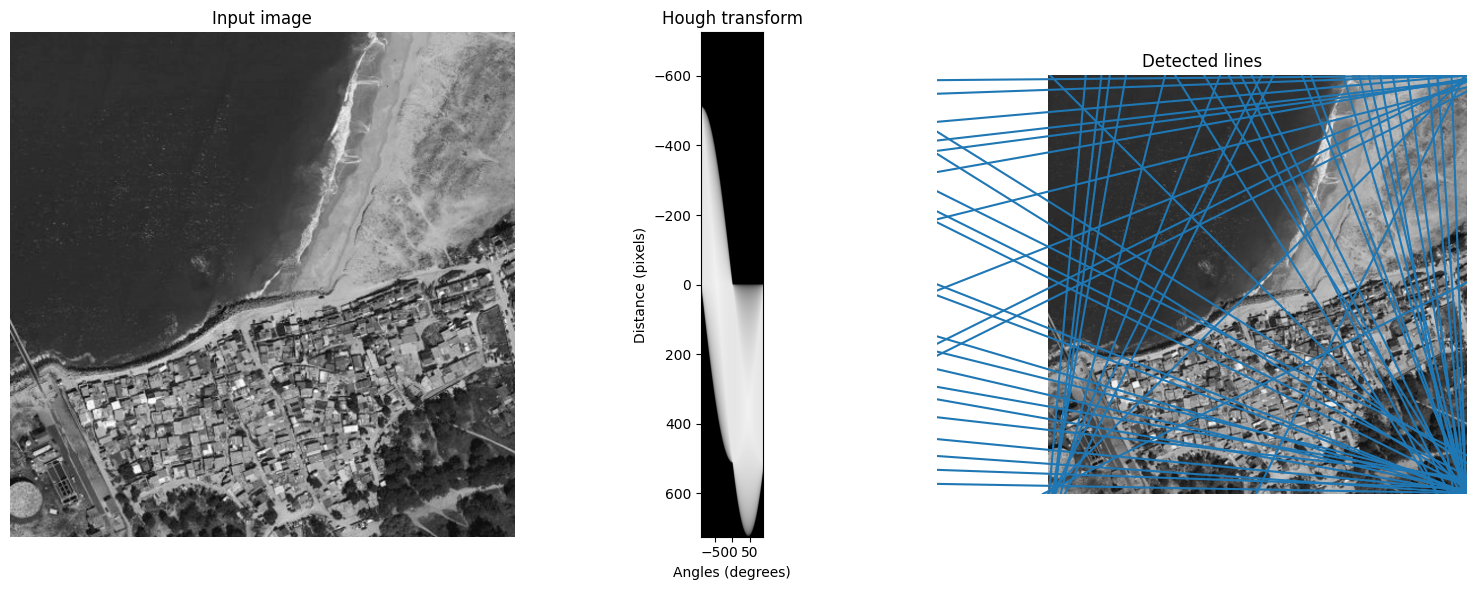

coast/c0678.png


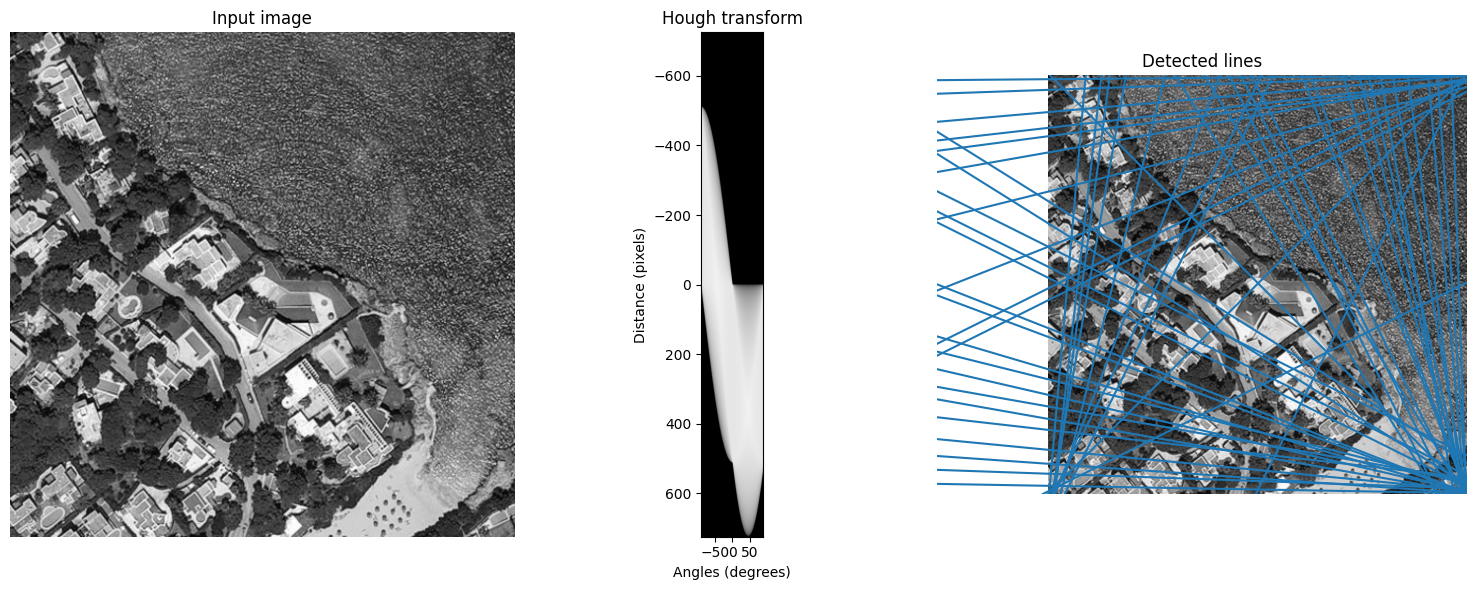

ship/s0995.png


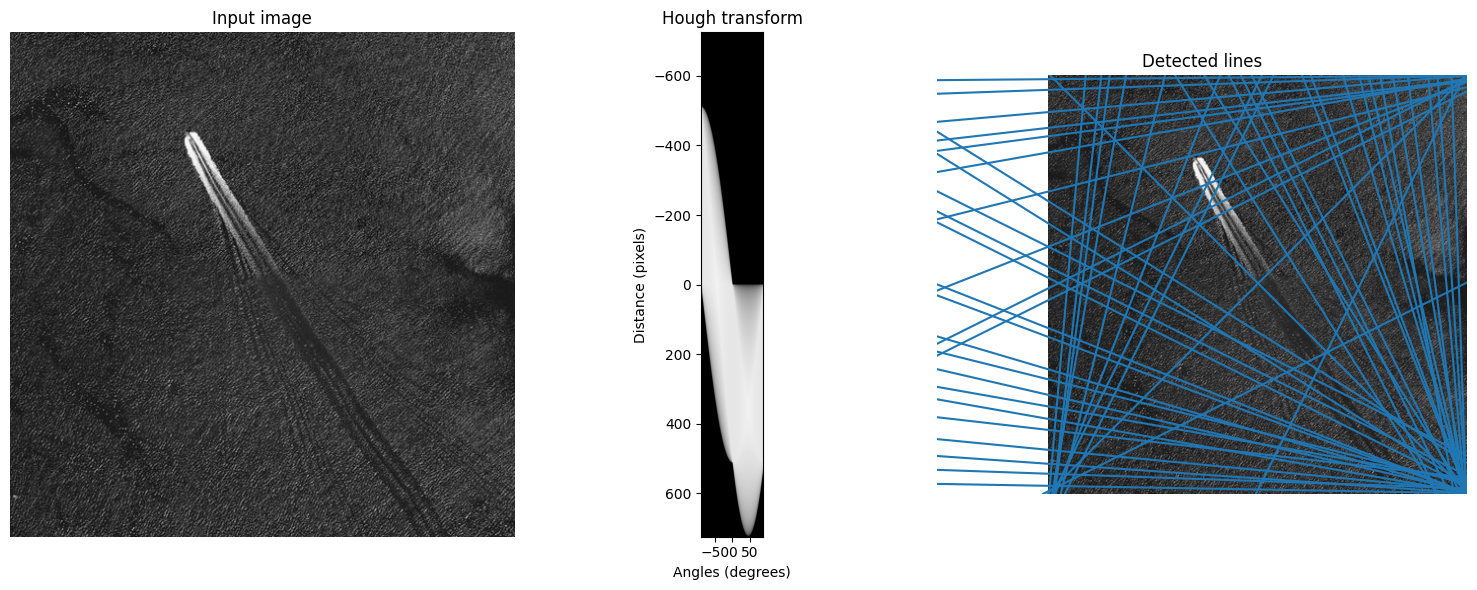

ship/s0754.png


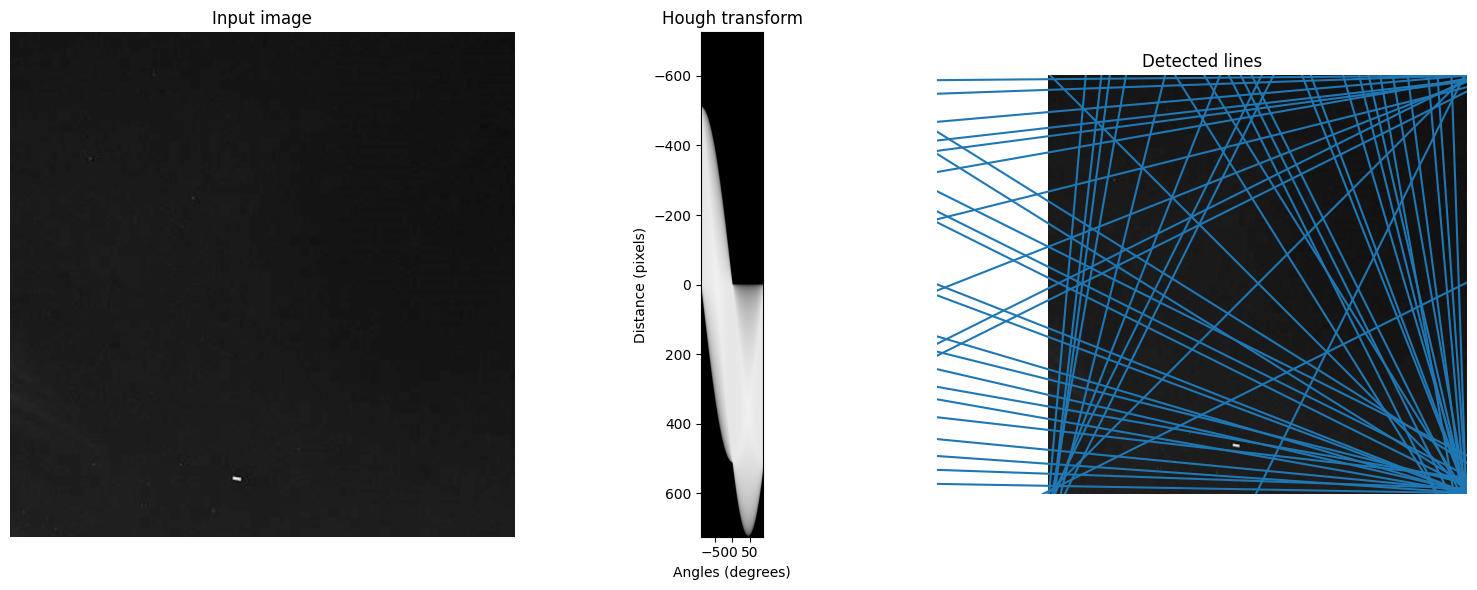

coast_ship/x0111.png


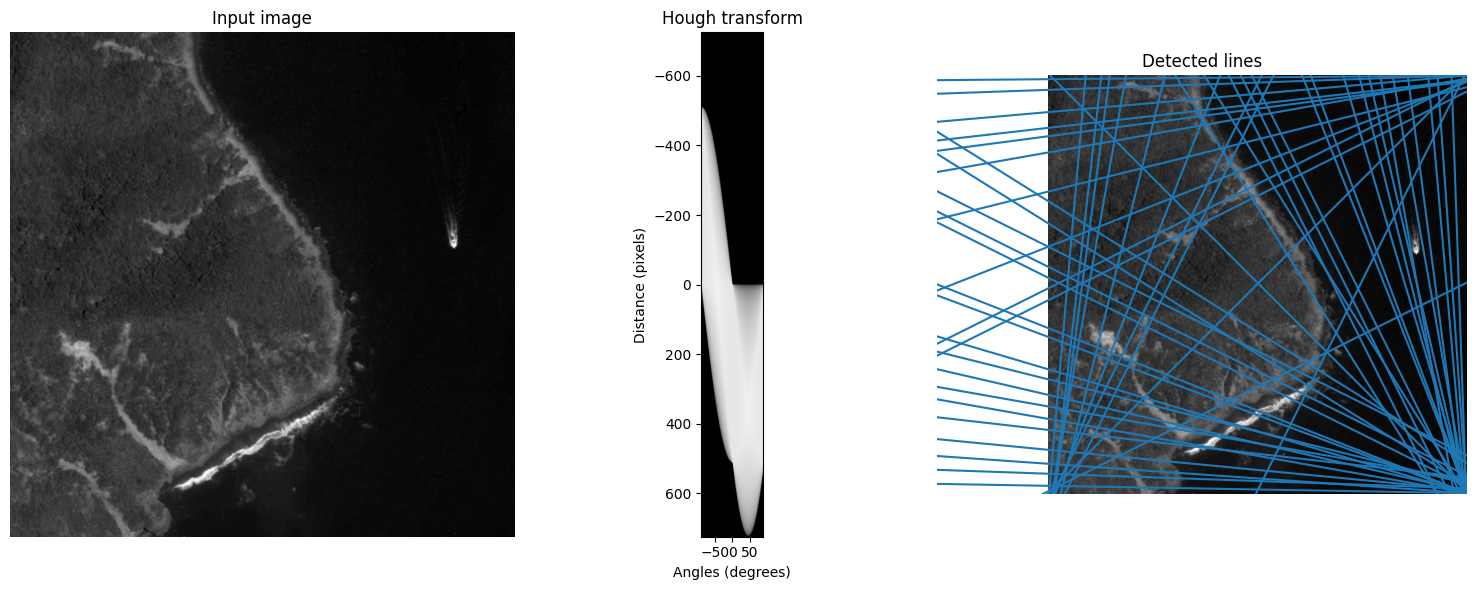

In [6]:
test_files = ['coast/c0019.png', 'coast/c0678.png', 
              'ship/s0995.png',  'ship/s0754.png', 
              'coast_ship/x0111.png']

for f in test_files:
  print(f)
  test_hough_line(f)